In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [3]:
df=pd.read_csv('C:\\Users\\paart\\Downloads\\heath-dataset\\healthcare-dataset-stroke-data.csv')

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
df.bmi=df.bmi.fillna(df.bmi.mean())

In [9]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
#plot graph for individual columns

<AxesSubplot:xlabel='gender', ylabel='count'>

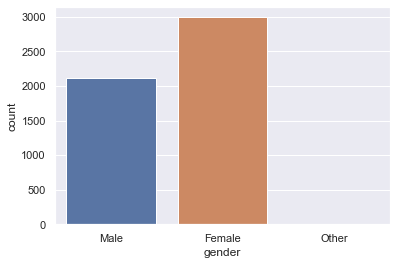

In [11]:
sns.countplot(x=df['gender'])

<AxesSubplot:xlabel='ever_married', ylabel='count'>

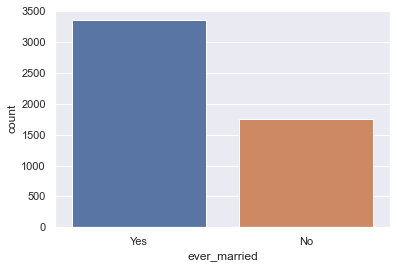

In [12]:
sns.countplot(x=df['ever_married'])

<AxesSubplot:xlabel='work_type', ylabel='count'>

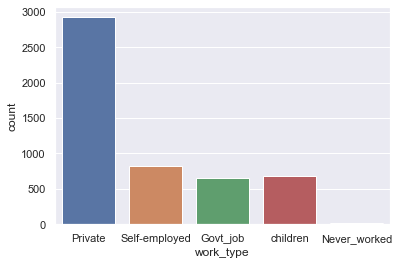

In [13]:
sns.countplot(x=df['work_type'])

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

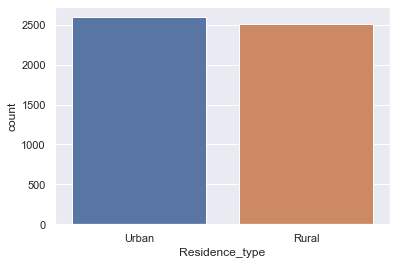

In [14]:
sns.countplot(x=df['Residence_type'])

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

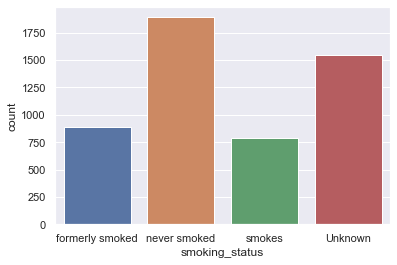

In [15]:
sns.countplot(x=df['smoking_status'])

In [16]:
df['smoking_status'].replace(to_replace='Unknown', value=df['bmi'].mode()[0], inplace=True)

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

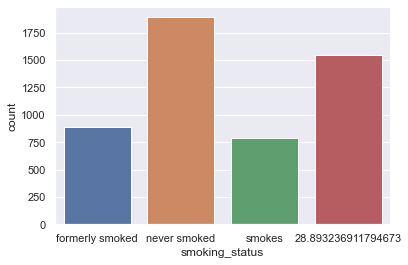

In [17]:
sns.countplot(x=df['smoking_status'])

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [19]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [20]:
a=pd.get_dummies(df.gender)
b=pd.get_dummies(df.ever_married)
c=pd.get_dummies(df.work_type)
d=pd.get_dummies(df.Residence_type)
e=pd.get_dummies(df.smoking_status)

In [21]:
merged=pd.concat([df, a, b, c, d, e,], axis='columns')
merged.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,Never_worked,Private,Self-employed,children,Rural,Urban,28.893236911794673,formerly smoked,never smoked,smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,...,0,1,0,0,0,1,0,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,...,0,0,1,0,1,0,0,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,...,0,1,0,0,1,0,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,...,0,1,0,0,0,1,0,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,...,0,0,1,0,1,0,0,0,1,0


In [22]:
data=merged.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'Male', 'Yes', 'Private', 'Urban', 'formerly smoked'], axis='columns')
data.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Other,No,Govt_job,Never_worked,Self-employed,children,Rural,28.893236911794673,never smoked,smokes
0,9046,67.0,0,1,228.69,36.600000,1,0,0,0,0,0,0,0,0,0,0,0
1,51676,61.0,0,0,202.21,28.893237,1,1,0,0,0,0,1,0,1,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,0,0,0,0,0,0,0,1,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,1,0,0,0,0,0,0,0,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,1,0,0,0,0,1,0,1,0,1,0


In [23]:
dff=data.apply(le.fit_transform)

In [24]:
x=dff.drop('stroke', axis='columns')
y=dff.stroke

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2)

In [27]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()

In [28]:
clf.fit(x_train, y_train)

C:\Users\paart\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

In [29]:
clf.score(x_test, y_test)

C:\Users\paart\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.09495099947701924

In [30]:
from sklearn import tree
model1=tree.DecisionTreeClassifier()
model1.fit(x_train, y_train)
model1.score(x_test, y_test)

C:\Users\paart\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\paart\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.9031311154598826

In [31]:
model1.predict(x_test)

C:\Users\paart\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float64', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)